<a href="https://colab.research.google.com/github/ian734/Segment-marketing-creates-precise-audiences-with-K-means/blob/main/%E5%88%86%E7%BE%A4%E8%A1%8C%E9%8A%B7%E5%89%B5%E9%80%A0%E7%B2%BE%E6%BA%96%E5%8F%97%E7%9C%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install jovian opendatasets --upgrade --quiet

!pip install numpy pandas matplotlib.pyplot seaborn  --upgrade --quite

!pip install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 591.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quite
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 86.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 re

In [ ]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import os

In [ ]:
import plotly.express as px

%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/prfolio/marketing_campaign.csv',sep="\t")
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
import matplotlib.style as style

style.use("fivethirtyeight")
style.use('seaborn-poster')

plt.rcParams['font.family'] = 'sans-serif'

<ipython-input-6-d04d4f28c970>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


# **1. Data Preparation**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## 1-1.Missing Values

In [ ]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**INSIGHT:收入有缺失值**

In [ ]:
data = data.dropna()

# **2.Feature Engineering**

In [ ]:
#age
data['age'] = 2015-data["Year_Birth"]


#kids
data['kids'] = data['Kidhome'] + data['Teenhome']


#marriage
relationship = {
    'Together': 'Partner',
    'Married': 'Partner',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}
data['Marital_Status'] = data['Marital_Status'].map(relationship)

#Spend
data['TotalSpendings'] =  data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

#AcceptedCmp
data['TotalAcceptedCmp'] = data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']+data['Response']

<ipython-input-11-440e0e1963ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = 2015-data["Year_Birth"]
<ipython-input-11-440e0e1963ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['kids'] = data['Kidhome'] + data['Teenhome']
<ipython-input-11-440e0e1963ba>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
#rename
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

Text(0, 0.5, 'age')

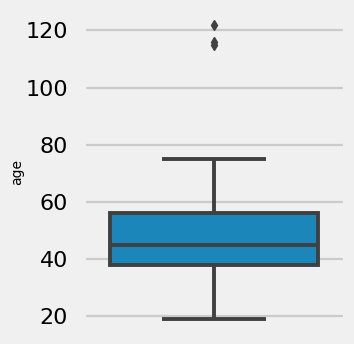

In [ ]:
#outlier
plt.figure(figsize=(3,4))
sns.boxplot(y=data.age);
plt.ylabel('age', fontsize=10, labelpad=1)

Text(0, 0.5, 'Income')

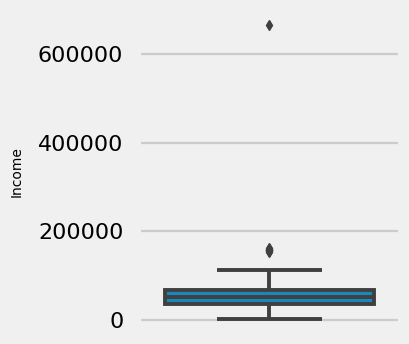

In [ ]:
#outlier
plt.figure(figsize=(3,4))
sns.boxplot(y=data.Income);
plt.ylabel('Income', fontsize=10, labelpad=10)

In [ ]:
print('number of data before removing the outliers are:',len(data))

data = data[(data['age']<100)]
data = data[(data['Income']<600000)]
print('number of data after removing the outliers are:',len(data))

number of data before removing the outliers are: 2216
number of data after removing the outliers are: 2212


In [ ]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   int64  
 1   Year_Birth           2212 non-null   int64  
 2   Education            2212 non-null   object 
 3   Marital_Status       1742 non-null   object 
 4   Income               2212 non-null   float64
 5   Kidhome              2212 non-null   int64  
 6   Teenhome             2212 non-null   int64  
 7   Dt_Customer          2212 non-null   object 
 8   Recency              2212 non-null   int64  
 9   Wines                2212 non-null   int64  
 10  Fruits               2212 non-null   int64  
 11  Meat                 2212 non-null   int64  
 12  Fish                 2212 non-null   int64  
 13  Sweets               2212 non-null   int64  
 14  Gold                 2212 non-null   int64  
 15  NumDealsPurchases    2212 non-null   i

In [ ]:
df = data.copy()

In [ ]:
#Dropping some of the redundant features
df = df.drop(['ID','Dt_Customer', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome',
        'Z_CostContact','Z_Revenue','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
        'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'], axis=1)

In [ ]:
#PCA col
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2212 non-null   float64
 1   Recency              2212 non-null   int64  
 2   Wines                2212 non-null   int64  
 3   Fruits               2212 non-null   int64  
 4   Meat                 2212 non-null   int64  
 5   Fish                 2212 non-null   int64  
 6   Sweets               2212 non-null   int64  
 7   Gold                 2212 non-null   int64  
 8   NumDealsPurchases    2212 non-null   int64  
 9   NumWebPurchases      2212 non-null   int64  
 10  NumCatalogPurchases  2212 non-null   int64  
 11  NumStorePurchases    2212 non-null   int64  
 12  NumWebVisitsMonth    2212 non-null   int64  
 13  age                  2212 non-null   int64  
 14  kids                 2212 non-null   int64  
 15  TotalSpendings       2212 non-null   i

# **3.EDA**

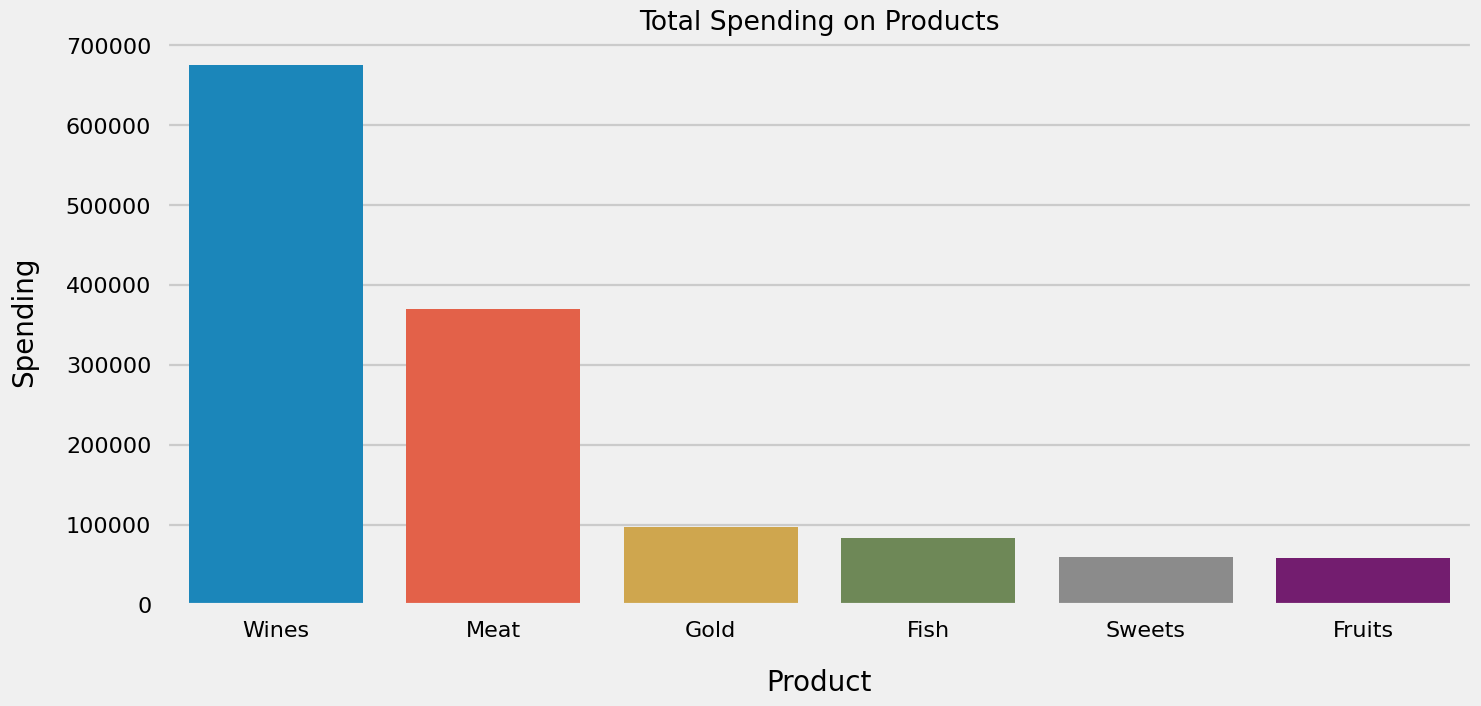

In [ ]:
products = df[['Wines','Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]
product_means = products.sum(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Spending'])

plt.figure(figsize=(15,7))
plt.title('Total Spending on Products')
sns.barplot(data=product_means_df, x='Product', y='Spending');
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Spending', fontsize=20, labelpad=20);

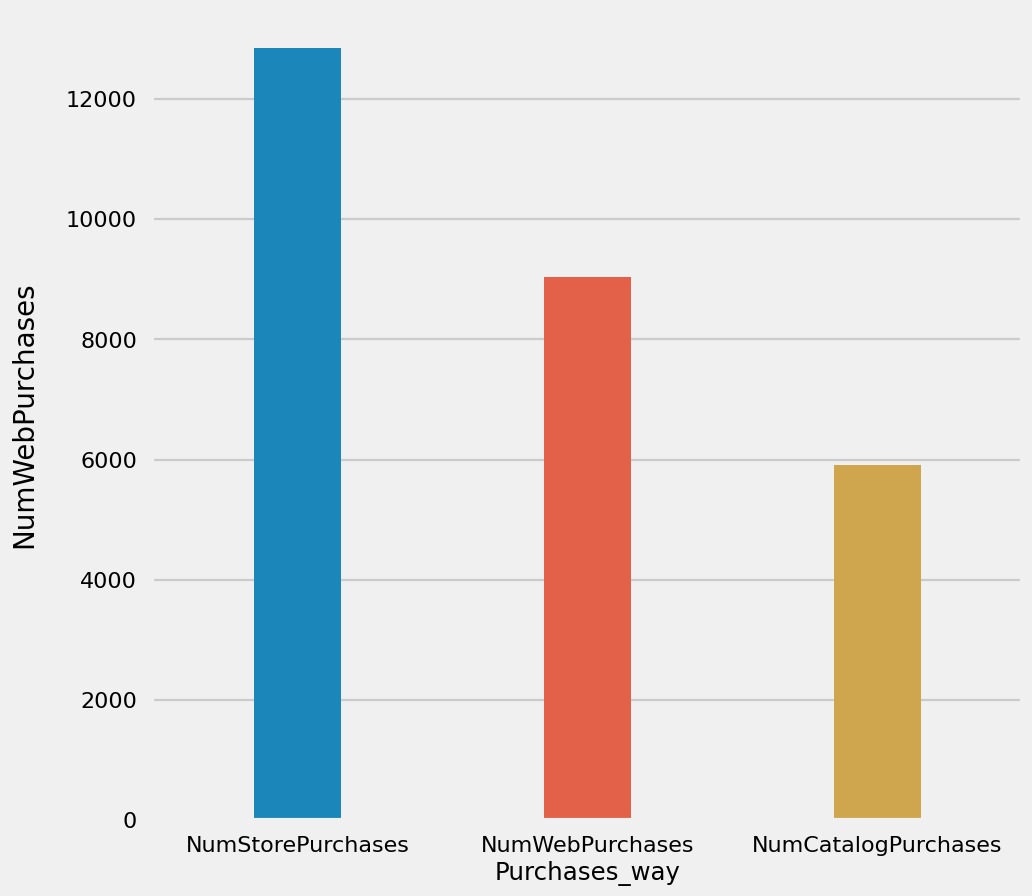

In [ ]:
purchases_way = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
purchases_means = purchases_way.sum(axis=0).sort_values(ascending=False)
purchases_means_df = pd.DataFrame(list(purchases_means.items()), columns=['Purchases_way', 'NumWebPurchases'])

plt.figure(figsize=(10,10))

sns.barplot(data=purchases_means_df, x='Purchases_way', y='NumWebPurchases',width=0.3);
plt.ylabel('NumWebPurchases', fontsize=20, labelpad=20);

In [ ]:
df_hobby = df.drop(['Recency','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','TotalAcceptedCmp'], axis=1)

In [ ]:
df_value = df.drop(['Wines','Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'], axis=1)

In [ ]:
df_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2212 non-null   float64
 1   Recency              2212 non-null   int64  
 2   NumDealsPurchases    2212 non-null   int64  
 3   NumWebPurchases      2212 non-null   int64  
 4   NumCatalogPurchases  2212 non-null   int64  
 5   NumStorePurchases    2212 non-null   int64  
 6   NumWebVisitsMonth    2212 non-null   int64  
 7   age                  2212 non-null   int64  
 8   kids                 2212 non-null   int64  
 9   TotalSpendings       2212 non-null   int64  
 10  TotalAcceptedCmp     2212 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 207.4 KB


In [ ]:
df_hobby.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2212 non-null   float64
 1   Wines           2212 non-null   int64  
 2   Fruits          2212 non-null   int64  
 3   Meat            2212 non-null   int64  
 4   Fish            2212 non-null   int64  
 5   Sweets          2212 non-null   int64  
 6   Gold            2212 non-null   int64  
 7   age             2212 non-null   int64  
 8   kids            2212 non-null   int64  
 9   TotalSpendings  2212 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 190.1 KB


# **4.K-means**

## hobby

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)
pca.fit(df_hobby)
cust_prod_hobby = pca.transform(df_hobby)
tocluster_hobby = pd.DataFrame(cust_prod_hobby)

In [ ]:
#scaler 無pca
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
scaler = MinMaxScaler()
df_hobby_trans = scaler.fit_transform(tocluster_hobby)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

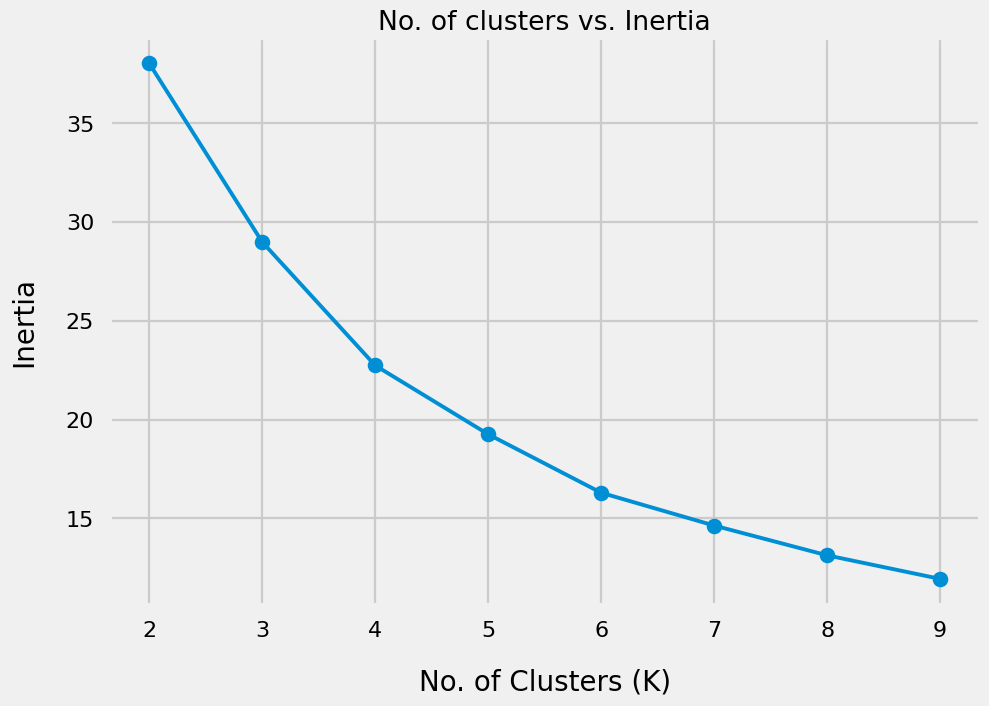

In [ ]:
#elbow
options = range(2,10)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=69).fit(df_hobby_trans)
    inertias.append(model.inertia_)

plt.figure(figsize=(10,7))
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20);

In [ ]:
model = KMeans(n_clusters=4, init='k-means++', random_state=69).fit(df_hobby_trans)

y = model.predict(df_hobby_trans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['cluster_hobby'] = y

df['cluster_hobby'].value_counts()

2    729
0    693
1    417
3    373
Name: cluster_hobby, dtype: int64

In [ ]:
df.head()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,kids,TotalSpendings,TotalAcceptedCmp,cluster_hobby
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,58,0,1617,1,3
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,61,2,27,0,2
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,50,0,776,0,1
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,31,1,53,0,0
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,34,1,422,0,2


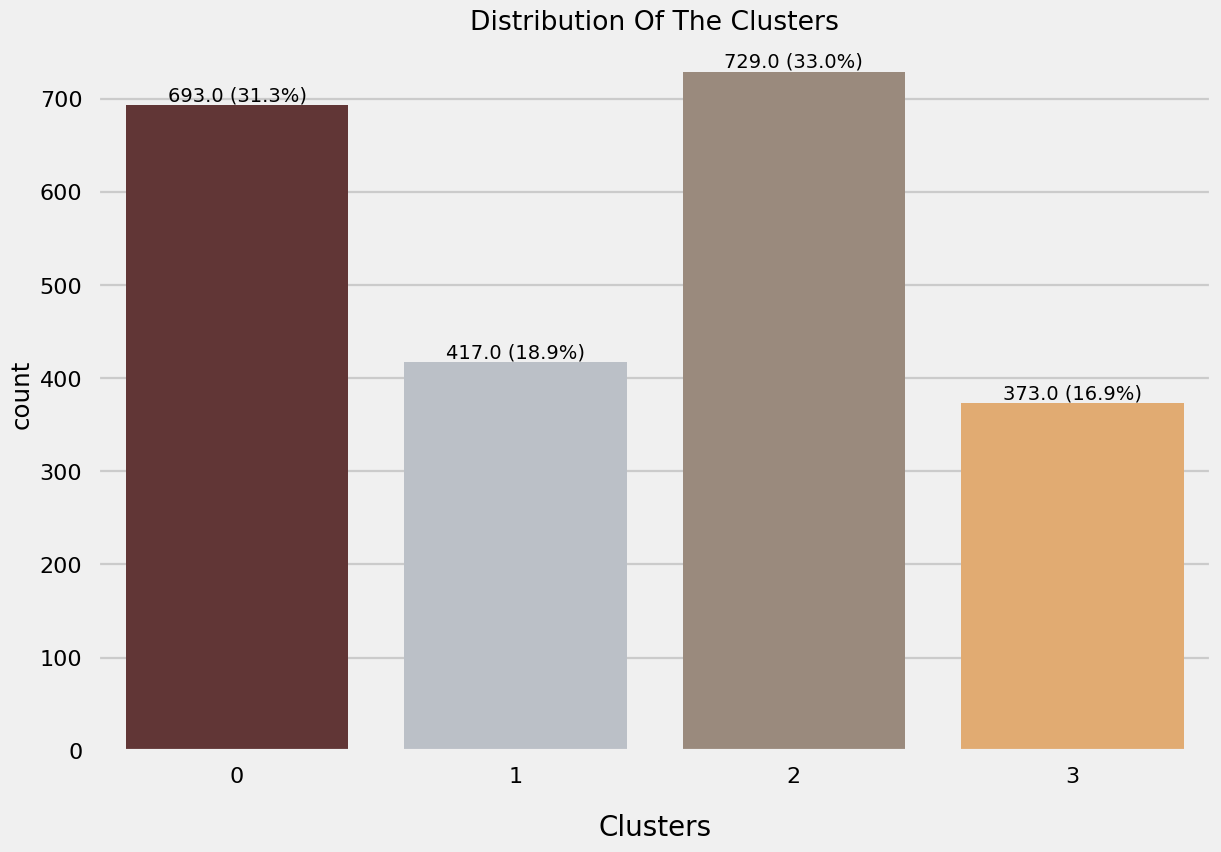

In [ ]:
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]
pl = sns.countplot(x=df["cluster_hobby"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.xlabel('Clusters', fontsize=20, labelpad=20)

total = float(len(df))
for p in pl.patches:
    height = p.get_height()
    pl.text(p.get_x() + p.get_width() / 2., height + 5,
            f'{height} ({height/total:.1%})', ha="center")

plt.show()

In [ ]:
cluster_spendings = df.groupby('cluster_hobby')[['Wines', 'Fruits','Meat', 'Fish', 'Sweets', 'Gold']].sum()
cluster_spendings['Total_Expenditure'] = cluster_spendings.sum(axis=1)
cluster_spendings

,Wines,Fruits,Meat,Fish,Sweets,Gold,Total_Expenditure
cluster_hobby,,,,,,,
0,23710,4844,20219,7338,4851,13531,74493
1,341189,15757,97114,22588,16836,28785,522269
2,130910,9927,50740,14494,11010,25294,242375
3,179487,27713,201397,38859,27130,29554,504140


In [ ]:
colors = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]


fig = px.pie(cluster_spendings, names=[0,1,2,3,], values='Total_Expenditure',
             color_discrete_sequence=colors,

             title="每個分群的總支出")

fig.update_traces(sort=False)
# 顯示圖形
fig.show()


<Figure size 2000x1000 with 0 Axes>

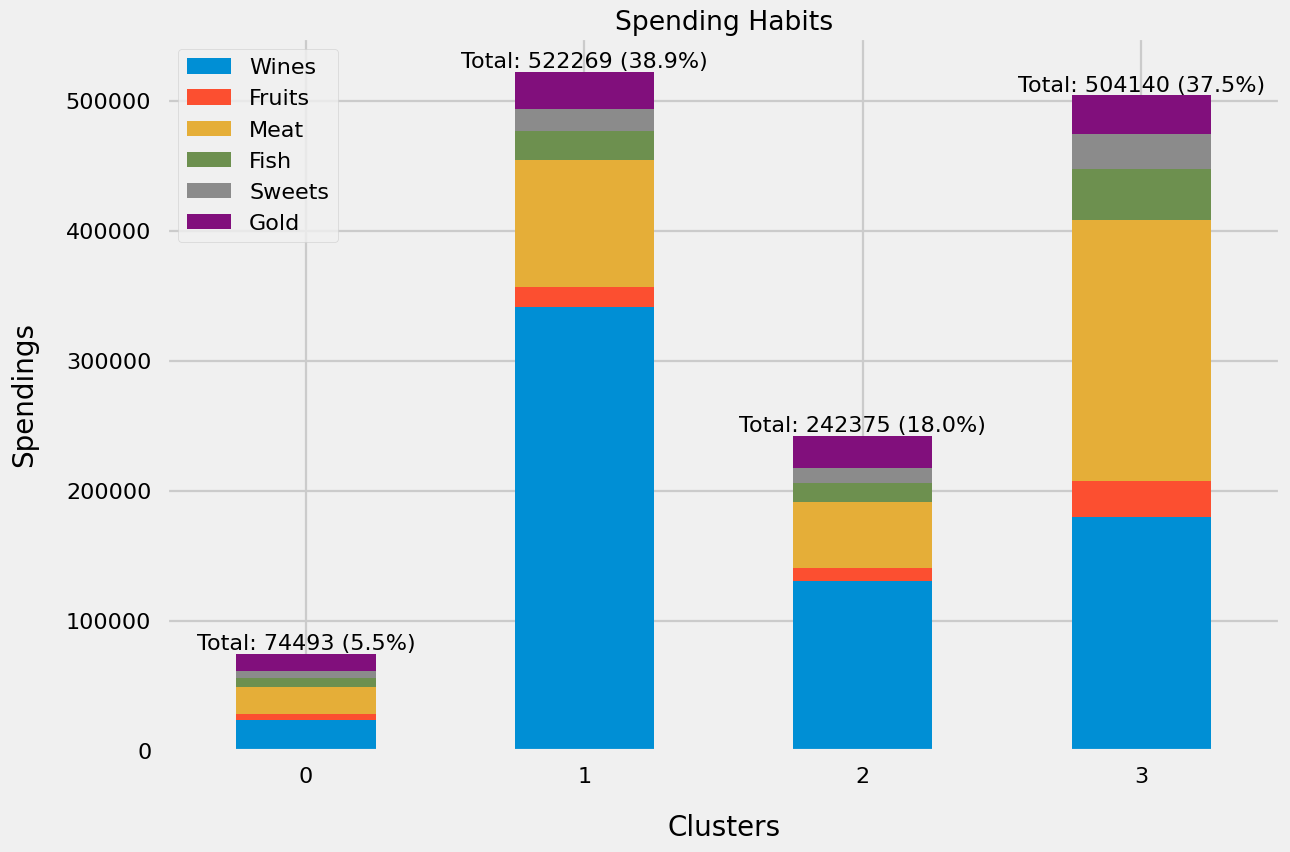

In [ ]:
cluster_spendings = df.groupby('cluster_hobby')[['Wines', 'Fruits','Meat', 'Fish', 'Sweets', 'Gold']].sum()
plt.figure(figsize=(20, 10))
ax = cluster_spendings.plot(kind='bar', stacked=True)

plt.title('Spending Habits')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)
plt.xticks(rotation=0, ha='center')

# add numbers & percent
total = cluster_spendings.sum(axis=1)
for i, t in enumerate(total):
    ax.text(i, t + 30, f'Total: {t} ({t / total.sum() * 100:.1f}%)', ha='center',va='bottom', fontsize=16)

plt.show()


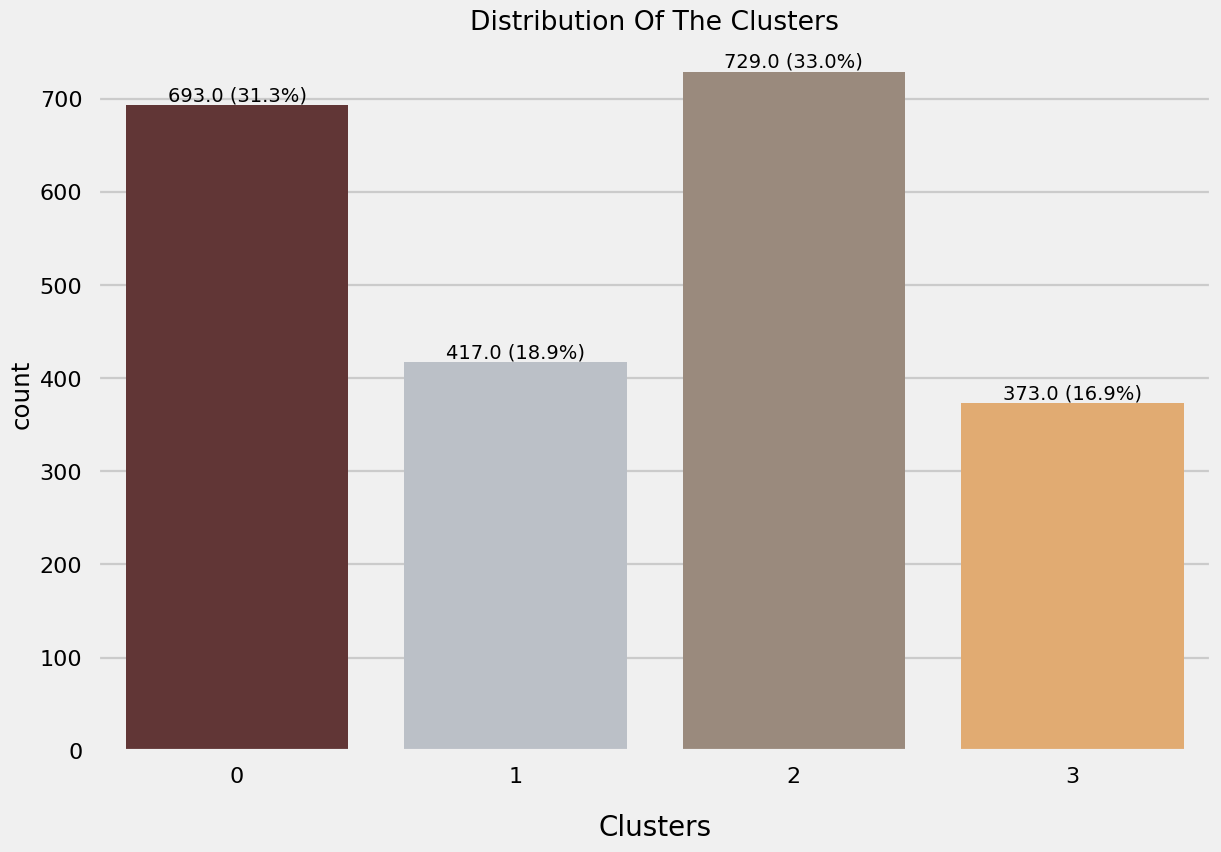

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["cluster_hobby"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.xlabel('Clusters', fontsize=20, labelpad=20)

total = float(len(df))
for p in pl.patches:
    height = p.get_height()
    pl.text(p.get_x() + p.get_width() / 2., height + 5,
            f'{height} ({height/total:.1%})', ha="center")

plt.show()

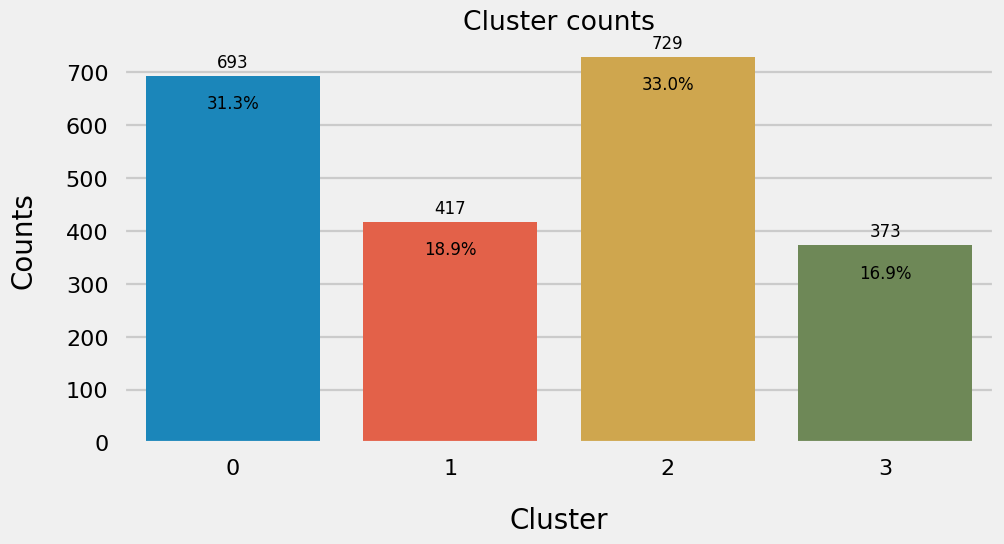

In [ ]:

cluster_counts = df['cluster_hobby'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Counts']

plt.figure(figsize=(10, 5))
plt.title('Cluster counts')


ax = sns.barplot(x='Cluster', y='Counts', data=cluster_counts)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, -20),
                textcoords='offset points')

plt.xlabel('Cluster', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20)
plt.show()



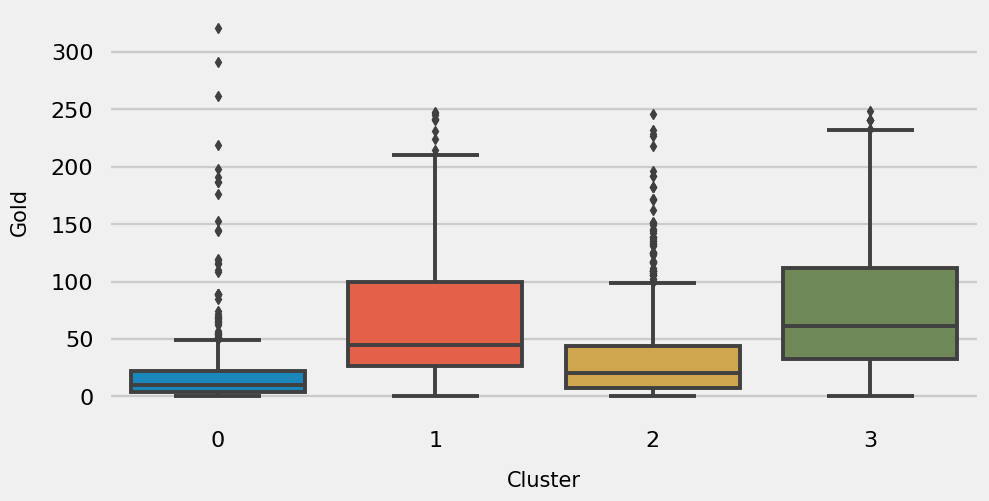

In [ ]:
#Gold

plt.figure(figsize=(10,5))

sns.boxplot(data=df, x='cluster_hobby', y = 'Gold');
plt.xlabel('Cluster', fontsize=15, labelpad=15)
plt.ylabel('Gold', fontsize=15, labelpad=15);

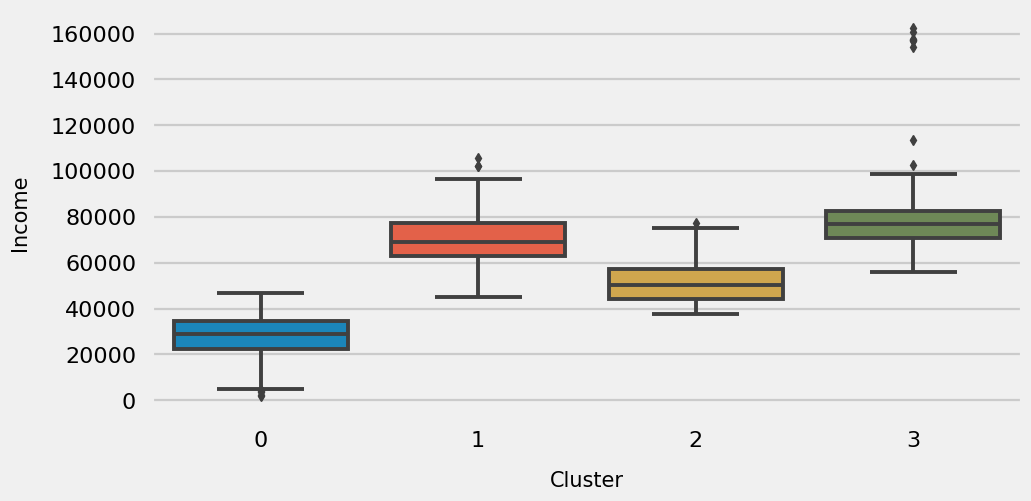

In [ ]:
#Income

plt.figure(figsize=(10,5))

sns.boxplot(data=df, x='cluster_hobby', y = 'Income');
plt.xlabel('Cluster', fontsize=15, labelpad=15)
plt.ylabel('Income', fontsize=15, labelpad=15);

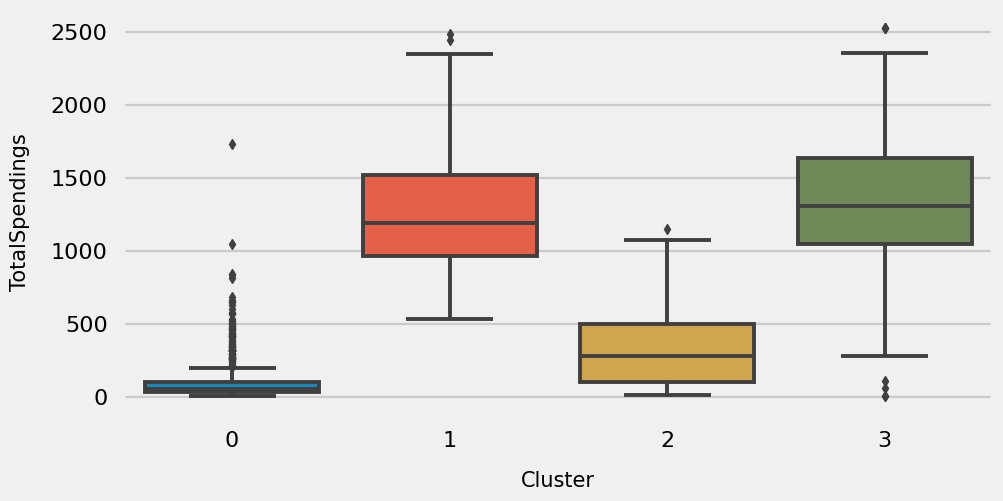

In [ ]:
#TotalSpendings

plt.figure(figsize=(10,5))

sns.boxplot(data=df, x='cluster_hobby', y = 'TotalSpendings');
plt.xlabel('Cluster', fontsize=15, labelpad=15)
plt.ylabel('TotalSpendings', fontsize=15, labelpad=15);

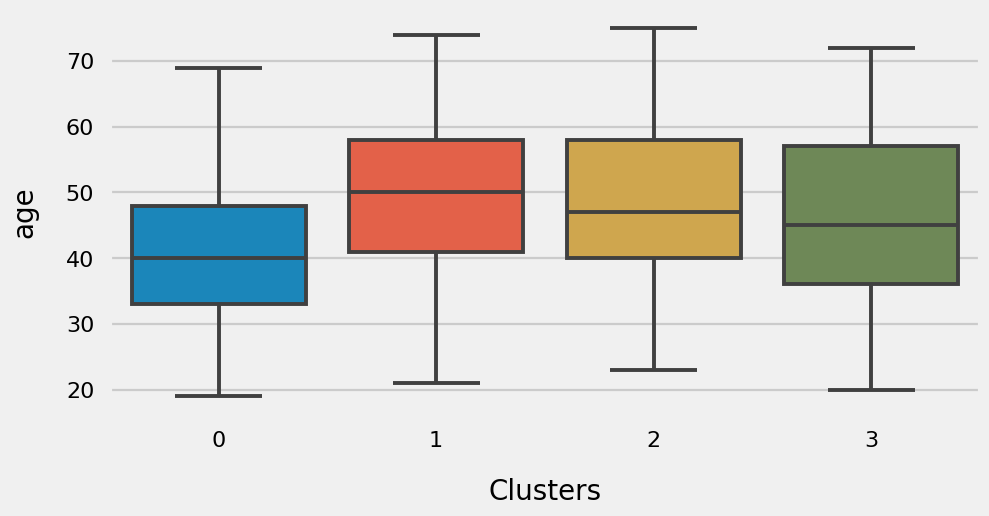

In [ ]:
#age

plt.figure(figsize=(10,5))

sns.boxplot(data=df, x='cluster_hobby', y = 'age');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('age', fontsize=20, labelpad=20);

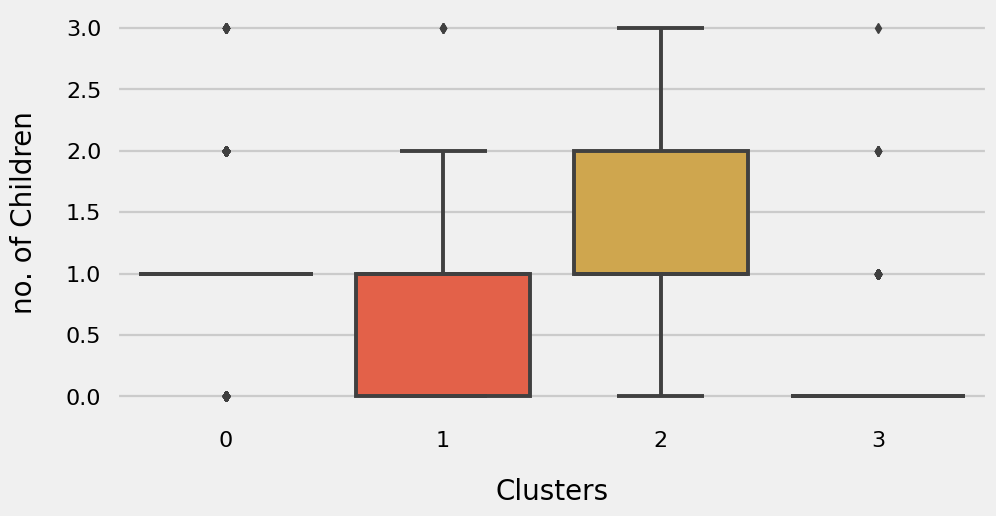

In [ ]:
#kids

plt.figure(figsize=(10,5))

sns.boxplot(data=df, x='cluster_hobby', y = 'kids');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('no. of Children', fontsize=20, labelpad=20);

In [ ]:
######cluster naming

df.cluster = df.cluster_hobby.replace({'3': 'Gold',
                '2': 'Silver',
                '0': 'Bronze',
                '1':'Diamond'})

df['cluster_hobby'] = df.cluster

<ipython-input-44-3b2aac6b4daf>:3: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



## value

In [ ]:
pca = PCA(n_components=4)
pca.fit(df_value)
cust_prod = pca.transform(df_value)
tocluster_value = pd.DataFrame(cust_prod)

In [ ]:
#scaler 無pca
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
scaler = MinMaxScaler()
df_value_trans = scaler.fit_transform(tocluster_value)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

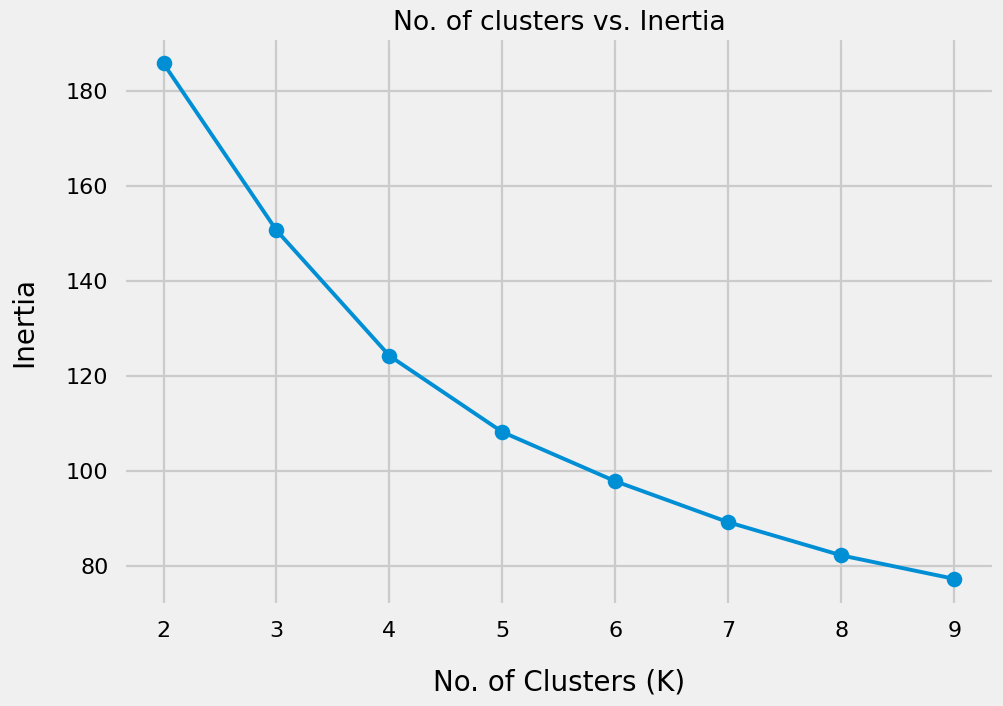

In [ ]:
#elbow
options = range(2,10)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=69).fit(df_value_trans)
    inertias.append(model.inertia_)

plt.figure(figsize=(10,7))
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20);

In [ ]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(df_value_trans)

y = model.predict(df_value_trans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df['cluster_value'] = y

df['cluster_value'].value_counts()

2    671
1    628
0    510
3    403
Name: cluster_value, dtype: int64

In [ ]:
df.head()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,kids,TotalSpendings,TotalAcceptedCmp,cluster_hobby,cluster_value
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,58,0,1617,1,3,0
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,61,2,27,0,2,3
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,50,0,776,0,1,3
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,31,1,53,0,0,2
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,34,1,422,0,2,1


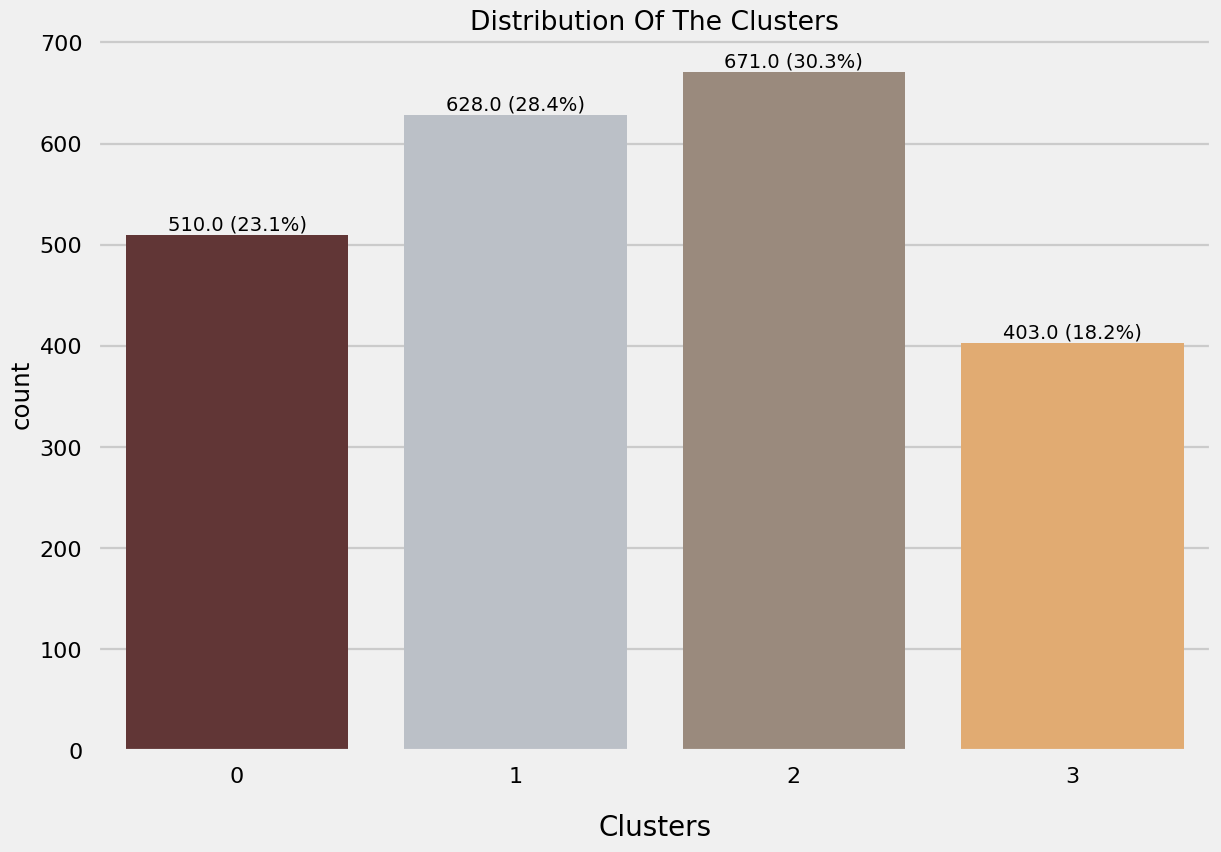

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["cluster_value"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.xlabel('Clusters', fontsize=20, labelpad=20)

total = float(len(df))
for p in pl.patches:
    height = p.get_height()
    pl.text(p.get_x() + p.get_width() / 2., height + 5,
            f'{height} ({height/total:.1%})', ha="center")

plt.show()

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["cluster_value"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.xlabel('Clusters', fontsize=20, labelpad=20)

total = float(len(df))
for p in pl.patches:
    height = p.get_height()
    pl.text(p.get_x() + p.get_width() / 2., height + 5,
            f'{height} ({height/total:.1%})', ha="center")

plt.show()

<Figure size 2000x1000 with 0 Axes>

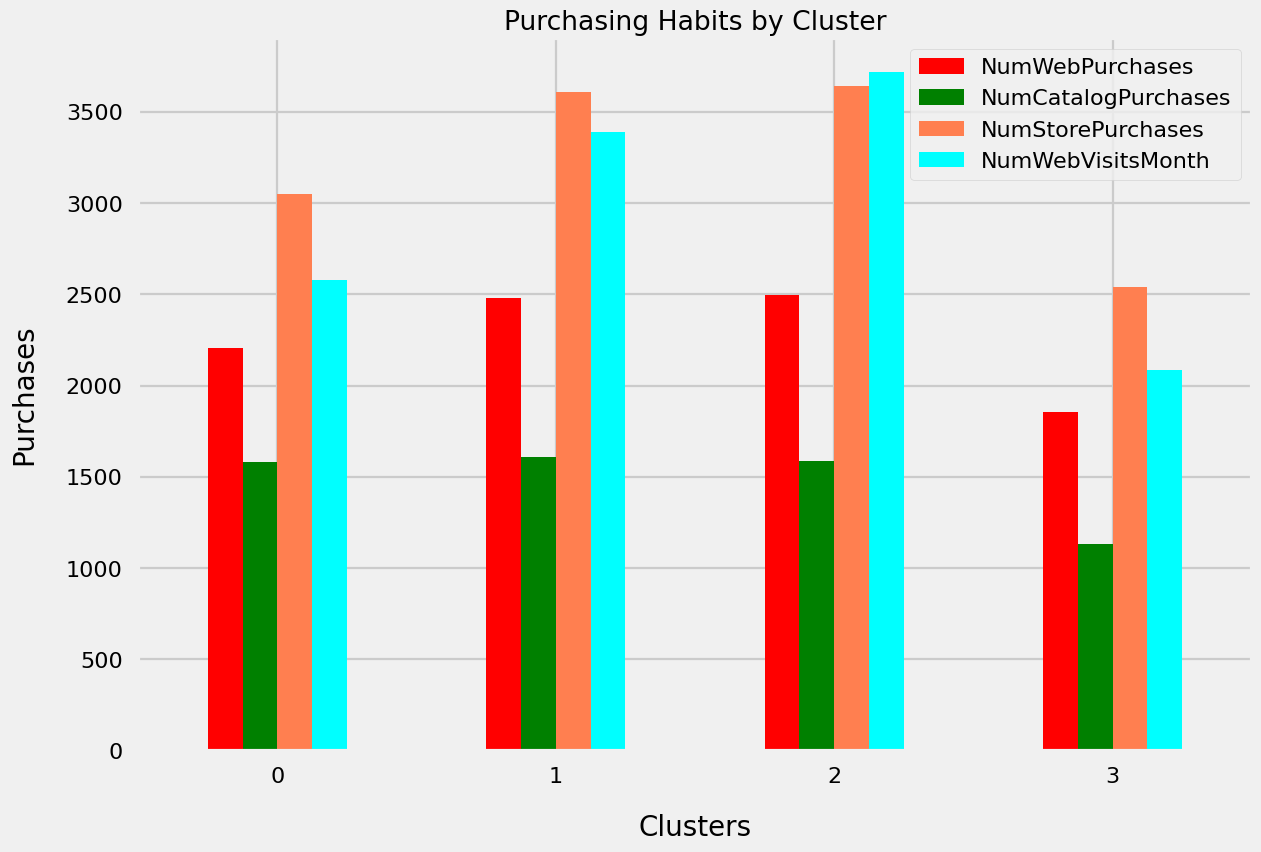

In [ ]:
cluster_purchases = df.groupby('cluster_value')[[ 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth']].sum()

plt.figure(figsize=(20,10))
cluster_purchases.plot(kind='bar', color=['red', 'green', 'coral', 'cyan'])

plt.title('Purchasing Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

### Place

In [ ]:
cluster_places = df.groupby('cluster_value')[['NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases']].sum()
cluster_places['Total_Expenditure'] = cluster_places.sum(axis=1)
cluster_places

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Expenditure
cluster_value,,,,
0,2208,1584,3051,6843
1,2480,1608,3610,7698
2,2499,1588,3643,7730
3,1856,1131,2540,5527


<Figure size 2000x1000 with 0 Axes>

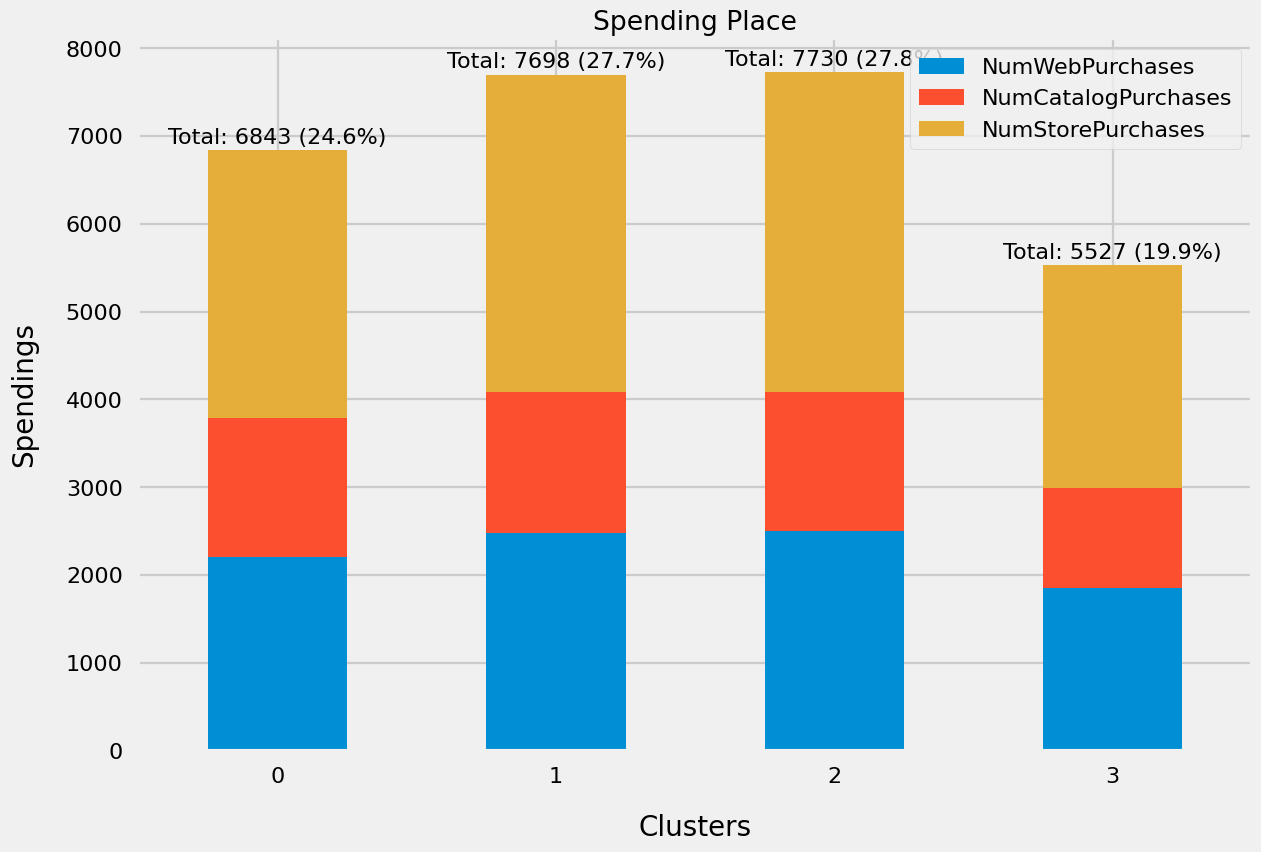

In [ ]:
cluster_spendings = df.groupby('cluster_value')[['NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases']].sum()
plt.figure(figsize=(20, 10))
ax = cluster_spendings.plot(kind='bar', stacked=True)

plt.title('Spending Place')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)
plt.xticks(rotation=0, ha='center')

# 添加数字和百分比标签
total = cluster_spendings.sum(axis=1)
for i, t in enumerate(total):
    ax.text(i, t + 30, f'Total: {t} ({t / total.sum() * 100:.1f}%)', ha='center',va='bottom', fontsize=16)

plt.show()


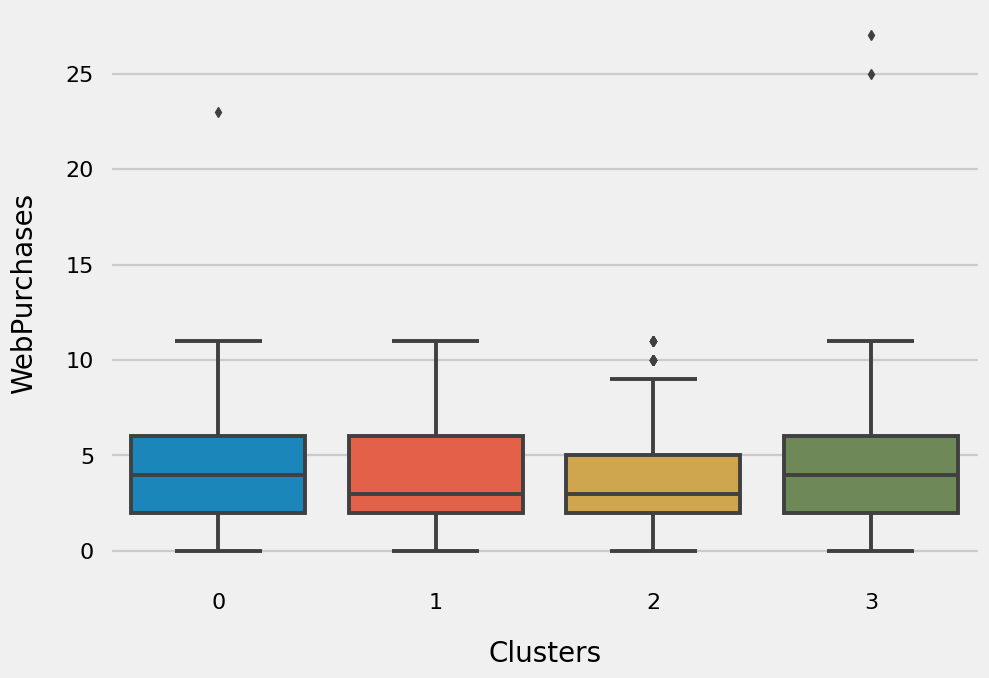

In [ ]:
# NumWebPurchasesWebPurchases

plt.figure(figsize=(10,7))

sns.boxplot(data=df, x='cluster_value', y = 'NumWebPurchases');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('WebPurchases', fontsize=20, labelpad=20);

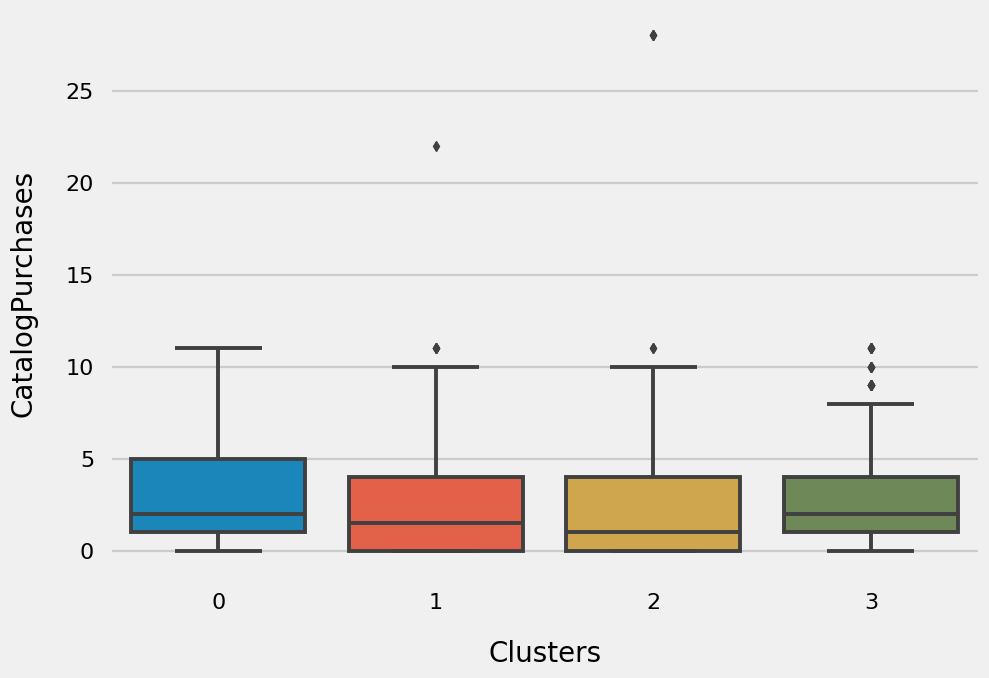

In [ ]:
# NumCatalogPurchases

plt.figure(figsize=(10,7))

sns.boxplot(data=df, x='cluster_value', y = 'NumCatalogPurchases');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('CatalogPurchases', fontsize=20, labelpad=20);

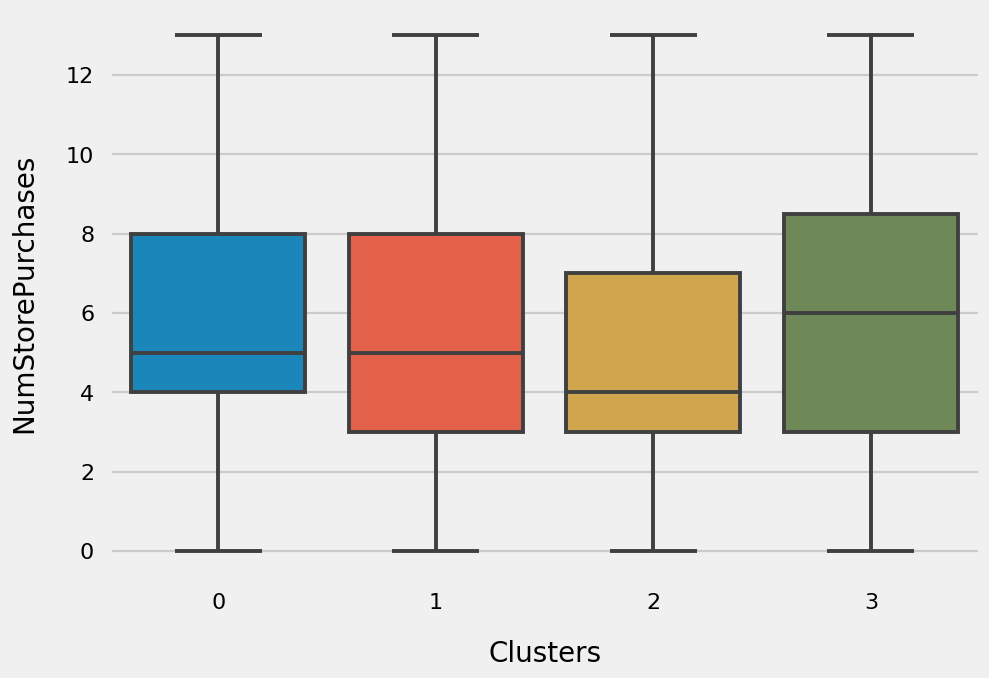

In [ ]:
# NumStorePurchases

plt.figure(figsize=(10,7))

sns.boxplot(data=df, x='cluster_value', y = 'NumStorePurchases');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('NumStorePurchases', fontsize=20, labelpad=20);

### WebVisits

<Figure size 2000x1000 with 0 Axes>

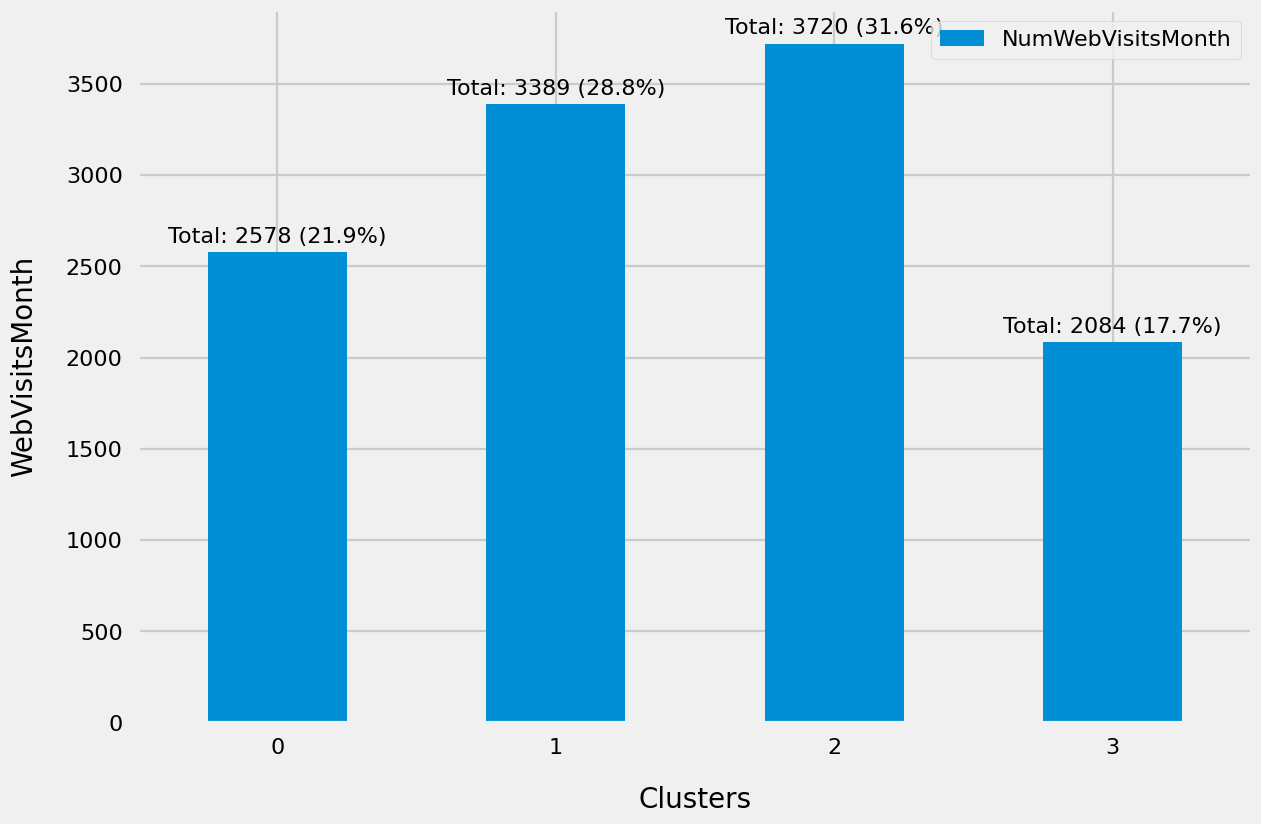

In [ ]:
cluster_spendings = df.groupby('cluster_value')[['NumWebVisitsMonth']].sum()
plt.figure(figsize=(20, 10))
ax = cluster_spendings.plot(kind='bar', stacked=True)

plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('WebVisitsMonth', fontsize=20, labelpad=20)
plt.xticks(rotation=0, ha='center')

# 添加数字和百分比标签
total = cluster_spendings.sum(axis=1)
for i, t in enumerate(total):
    ax.text(i, t + 30, f'Total: {t} ({t / total.sum() * 100:.1f}%)', ha='center',va='bottom', fontsize=16)

plt.show()


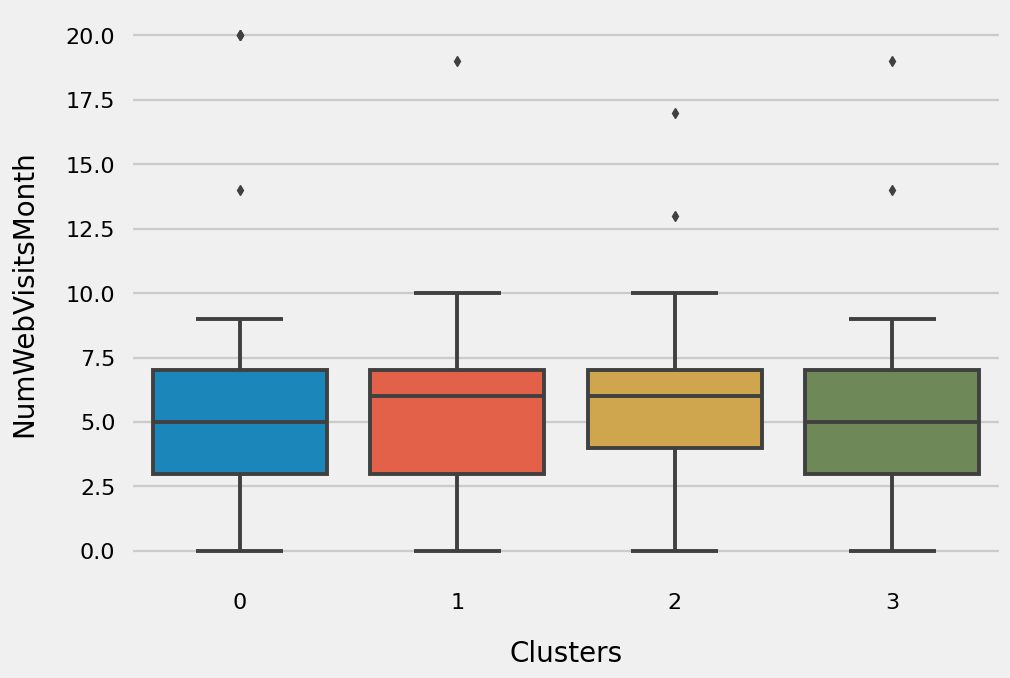

In [ ]:
# NumWebVisitsMonth

plt.figure(figsize=(10,7))

sns.boxplot(data=df, x='cluster_value', y = 'NumWebVisitsMonth');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('NumWebVisitsMonth', fontsize=20, labelpad=20);

### DealsPurchases

In [ ]:
cluster_DealsPurchases = df.groupby('cluster_value')[['NumDealsPurchases']].sum()
cluster_DealsPurchases

,NumDealsPurchases
cluster_value,
0,1246
1,1426
2,1483
3,987


<Figure size 2000x1000 with 0 Axes>

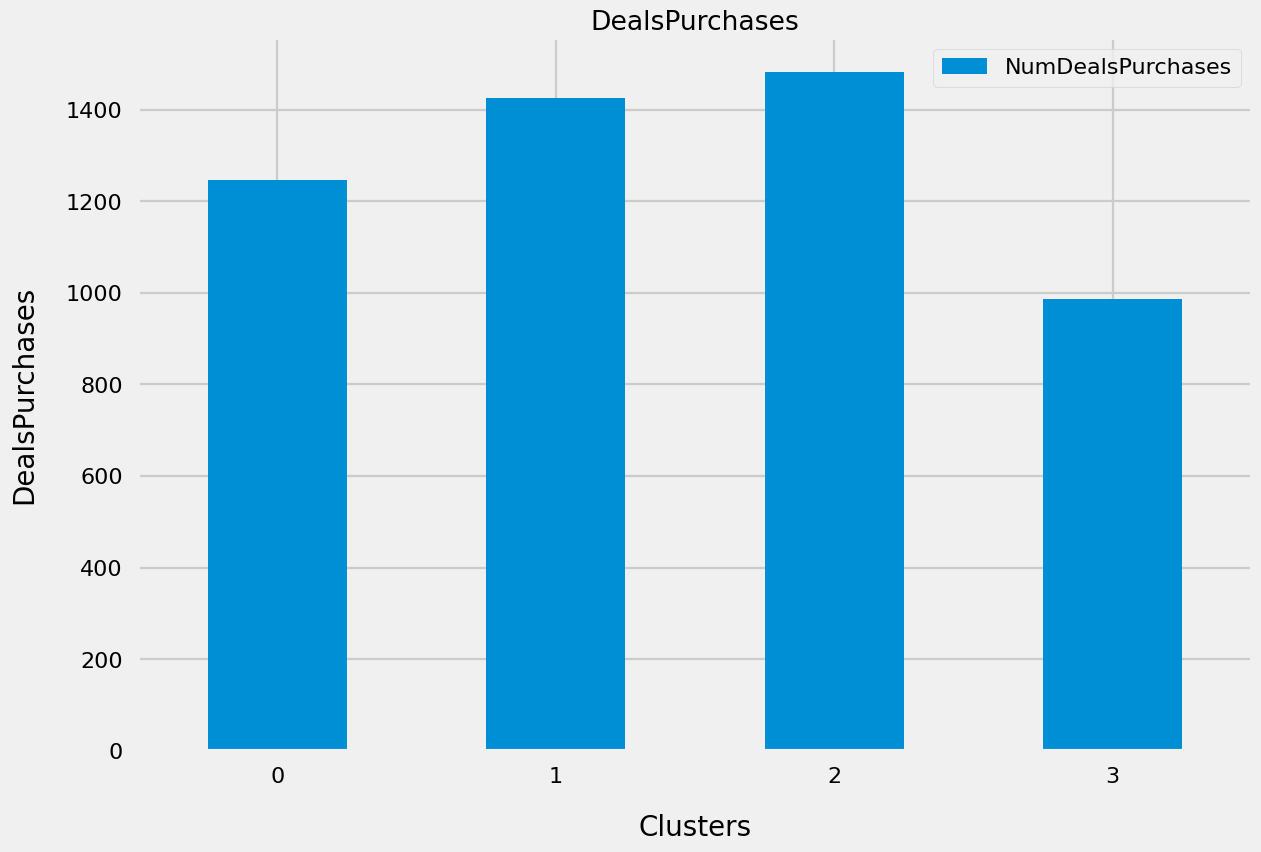

In [ ]:
cluster_spendings = df.groupby('cluster_value')[['NumDealsPurchases']].sum()

plt.figure(figsize=(20,10))
cluster_spendings.plot(kind='bar',stacked=True)

plt.title('DealsPurchases')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('DealsPurchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

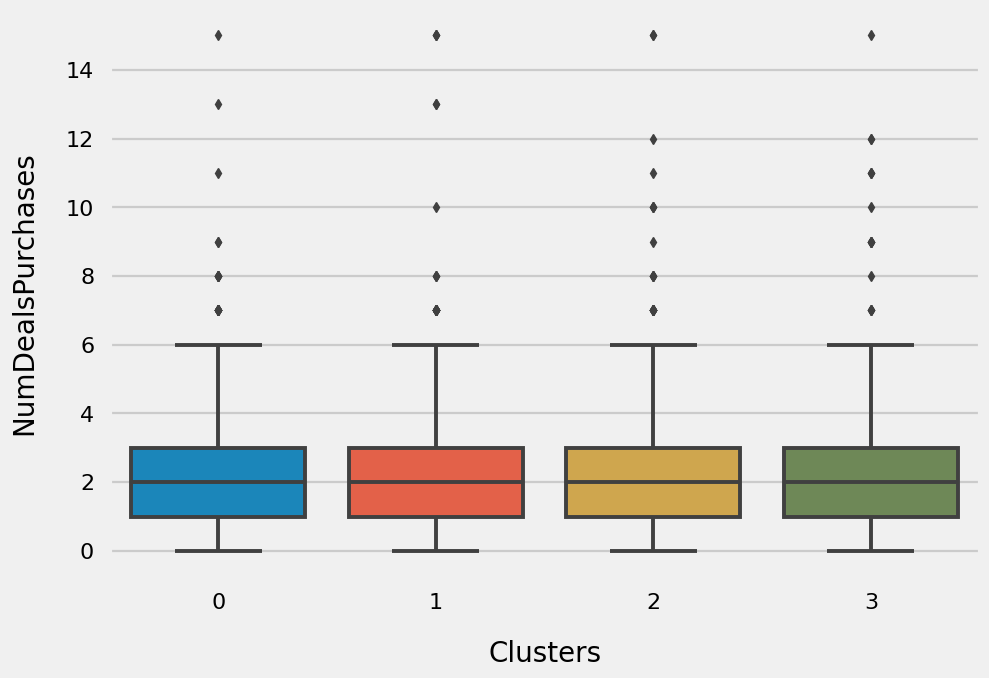

In [ ]:
# NumDealsPurchases

plt.figure(figsize=(10,7))

sns.boxplot(data=df, x='cluster_value', y = 'NumDealsPurchases');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('NumDealsPurchases', fontsize=20, labelpad=20);

### Recency

<Figure size 2000x1000 with 0 Axes>

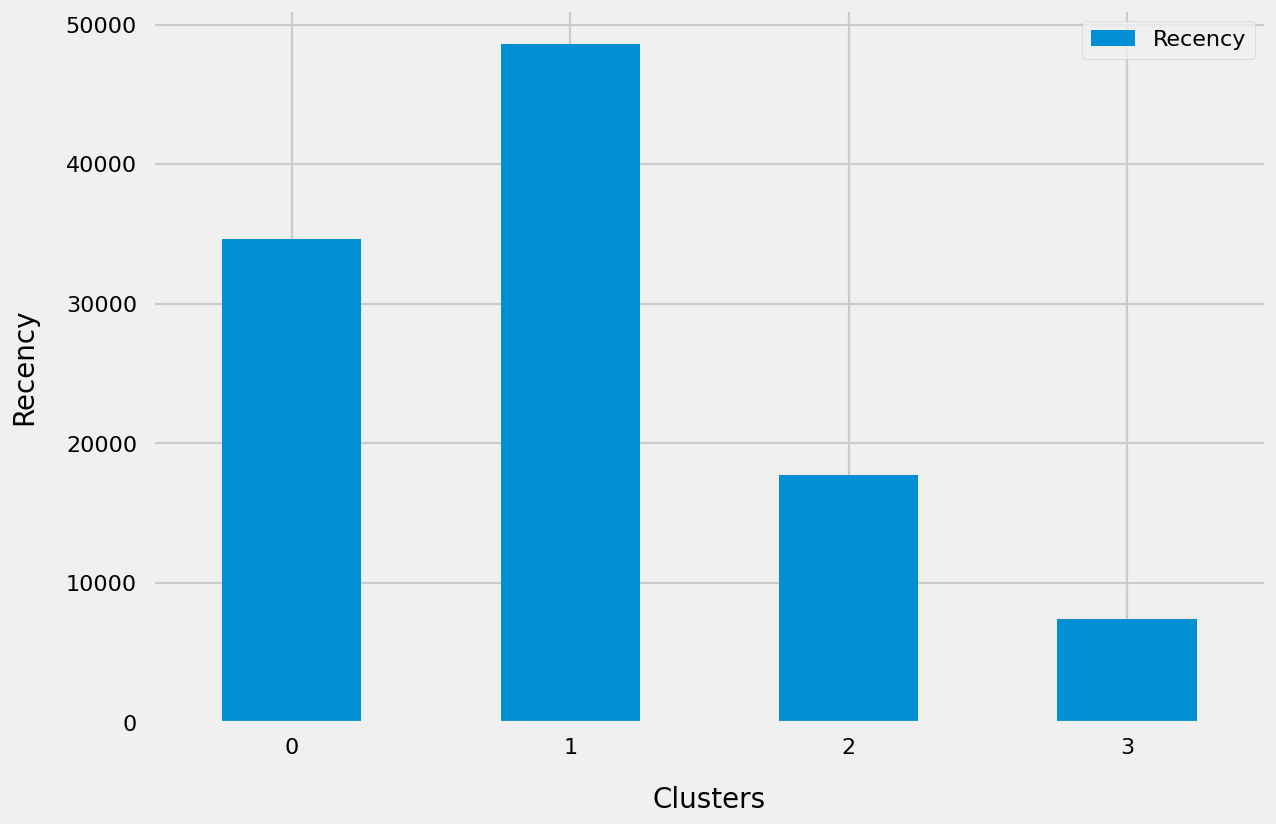

In [ ]:
cluster_spendings = df.groupby('cluster_value')[['Recency']].sum()


plt.figure(figsize=(20,10))
cluster_spendings.plot(kind='bar',stacked=True)

plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Recency', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

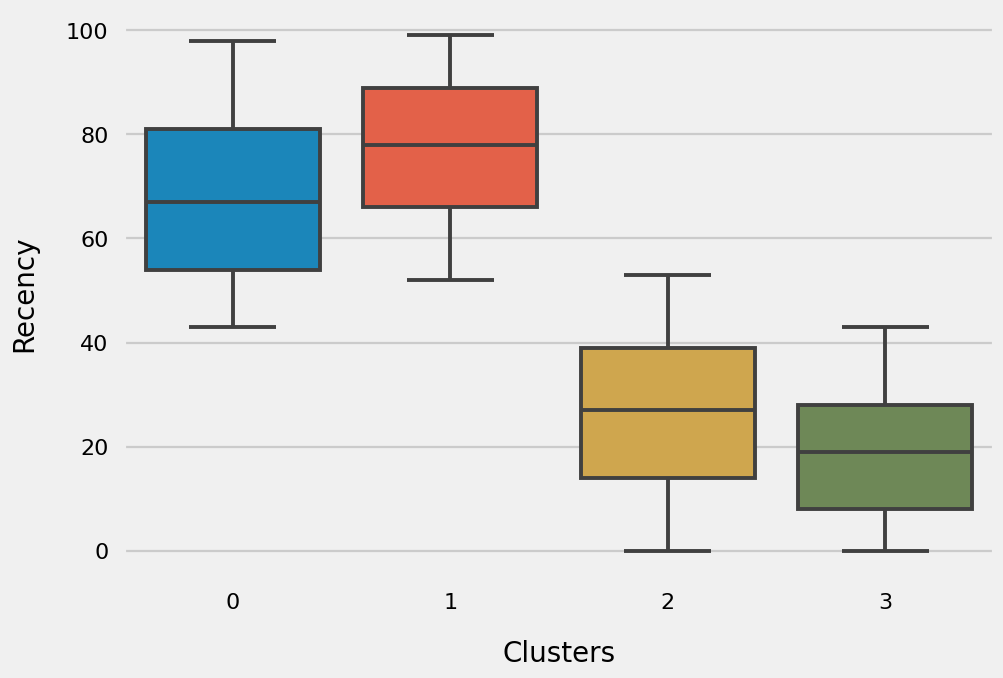

In [ ]:
# NumDealsPurchases

plt.figure(figsize=(10,7))

sns.boxplot(data=df, x='cluster_value', y = 'Recency');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Recency', fontsize=20, labelpad=20);

### Income

<Figure size 2000x1000 with 0 Axes>

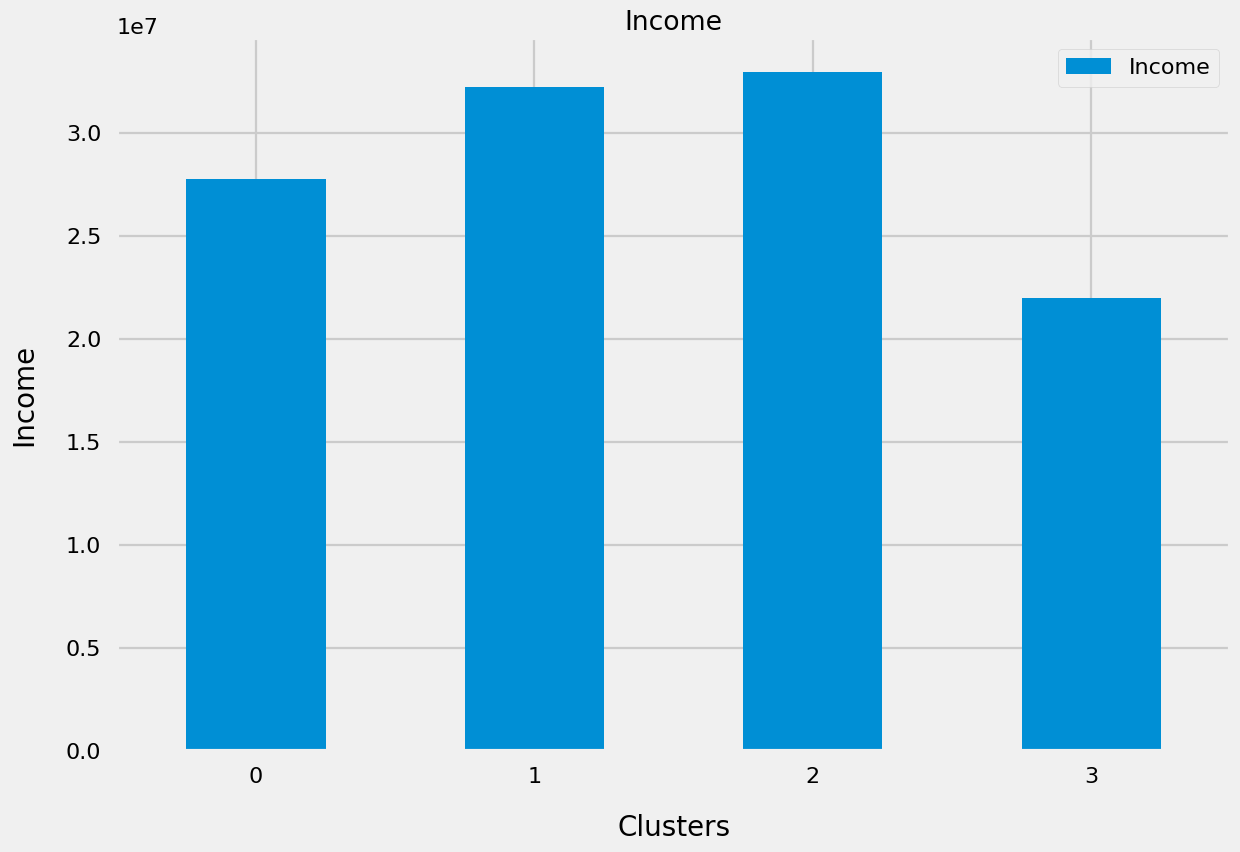

In [ ]:
cluster_spendings = df.groupby('cluster_value')[['Income']].sum()


plt.figure(figsize=(20,10))
cluster_spendings.plot(kind='bar',stacked=True)

plt.title('Income')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

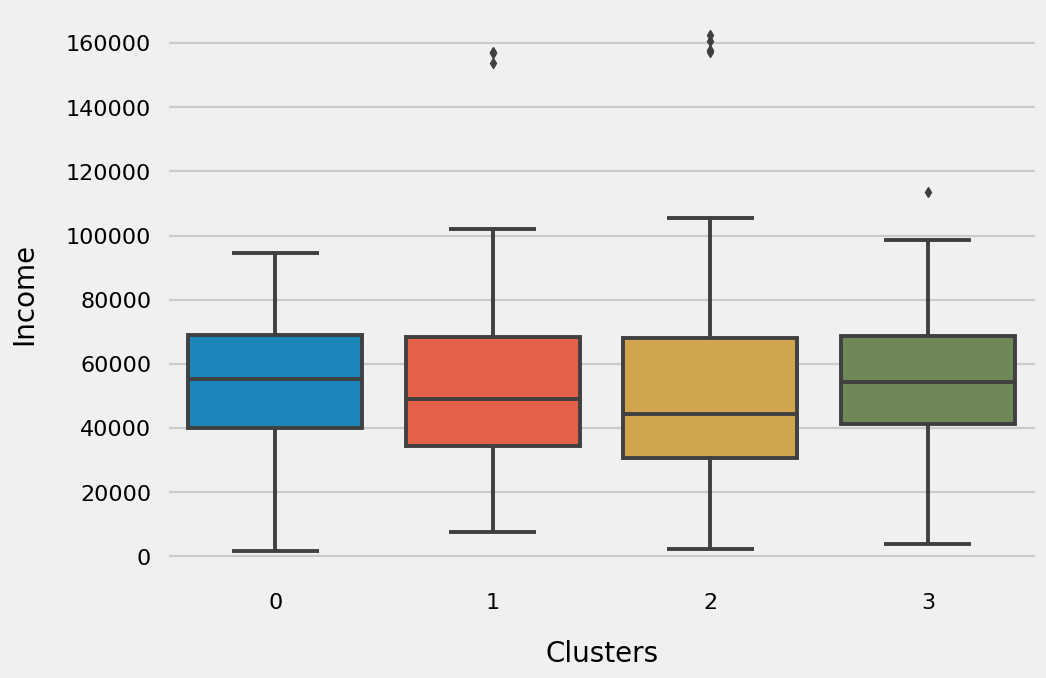

In [ ]:
# Income

plt.figure(figsize=(10,7))

sns.boxplot(data=df, x='cluster_value', y = 'Income');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20);

### TotalAcceptedCmp

<Figure size 2000x1000 with 0 Axes>

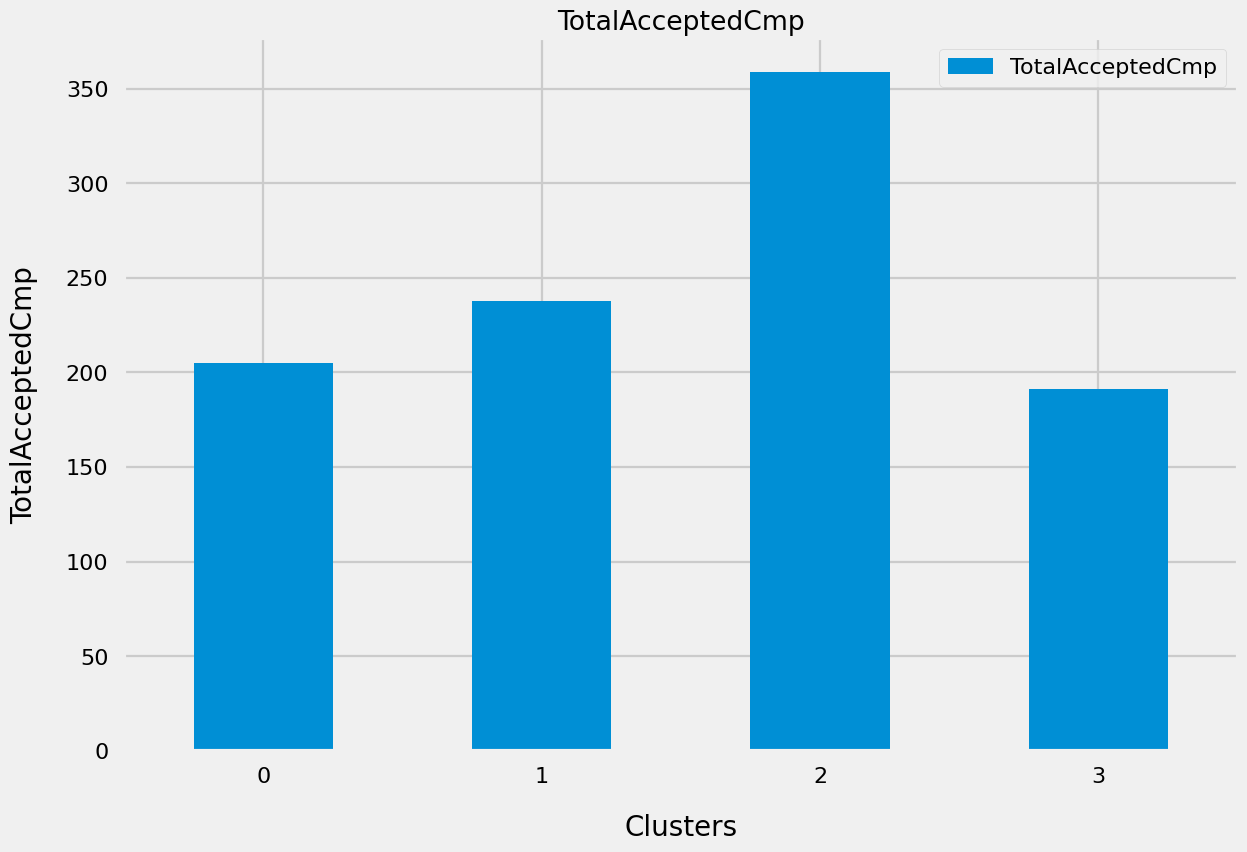

In [ ]:
cluster_spendings = df.groupby('cluster_value')[['TotalAcceptedCmp']].sum()


plt.figure(figsize=(20,10))
cluster_spendings.plot(kind='bar',stacked=True)

plt.title('TotalAcceptedCmp')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('TotalAcceptedCmp', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

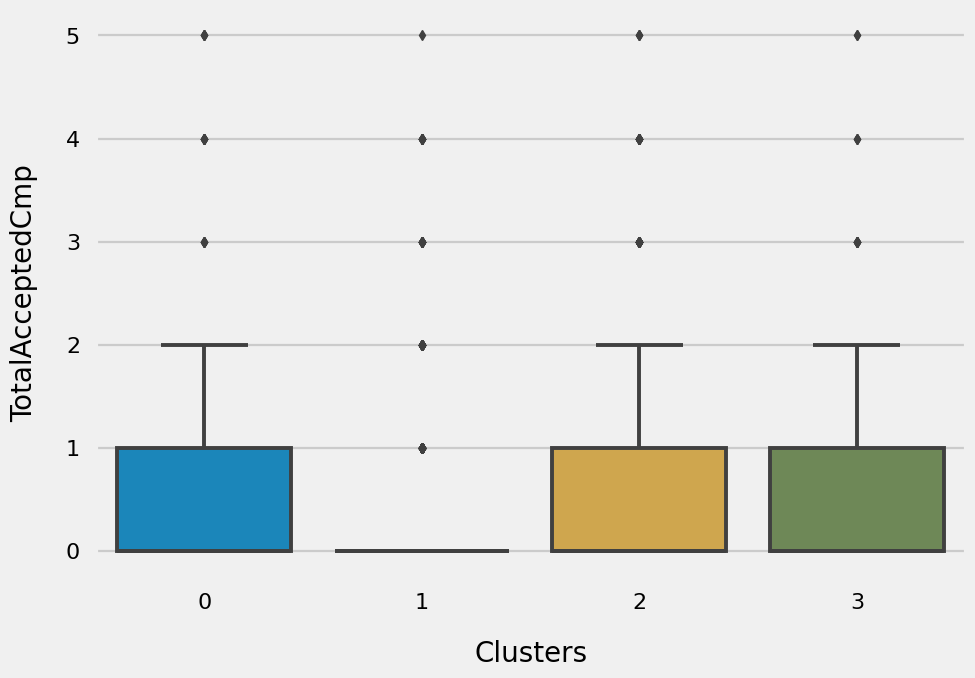

In [ ]:
# Income

plt.figure(figsize=(10,7))

sns.boxplot(data=df, x='cluster_value', y = 'TotalAcceptedCmp');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('TotalAcceptedCmp', fontsize=20, labelpad=20);

<Figure size 2000x1000 with 0 Axes>

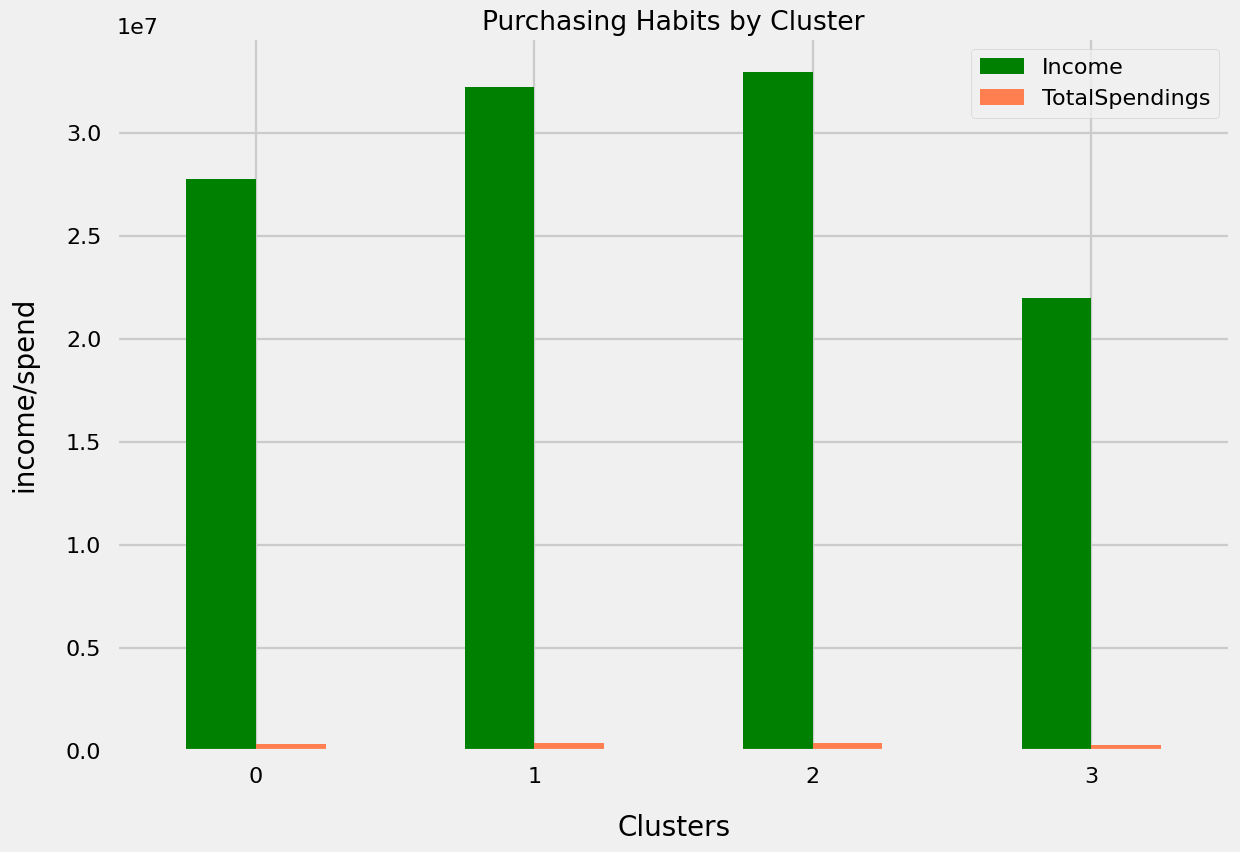

In [ ]:
income_spend = df.groupby('cluster_value')[['Income', 'TotalSpendings']].sum()

plt.figure(figsize=(20,10))
income_spend .plot(kind='bar', color=[ 'green', 'coral'])

plt.title('Purchasing Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('income/spend', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

<Figure size 2000x1000 with 0 Axes>

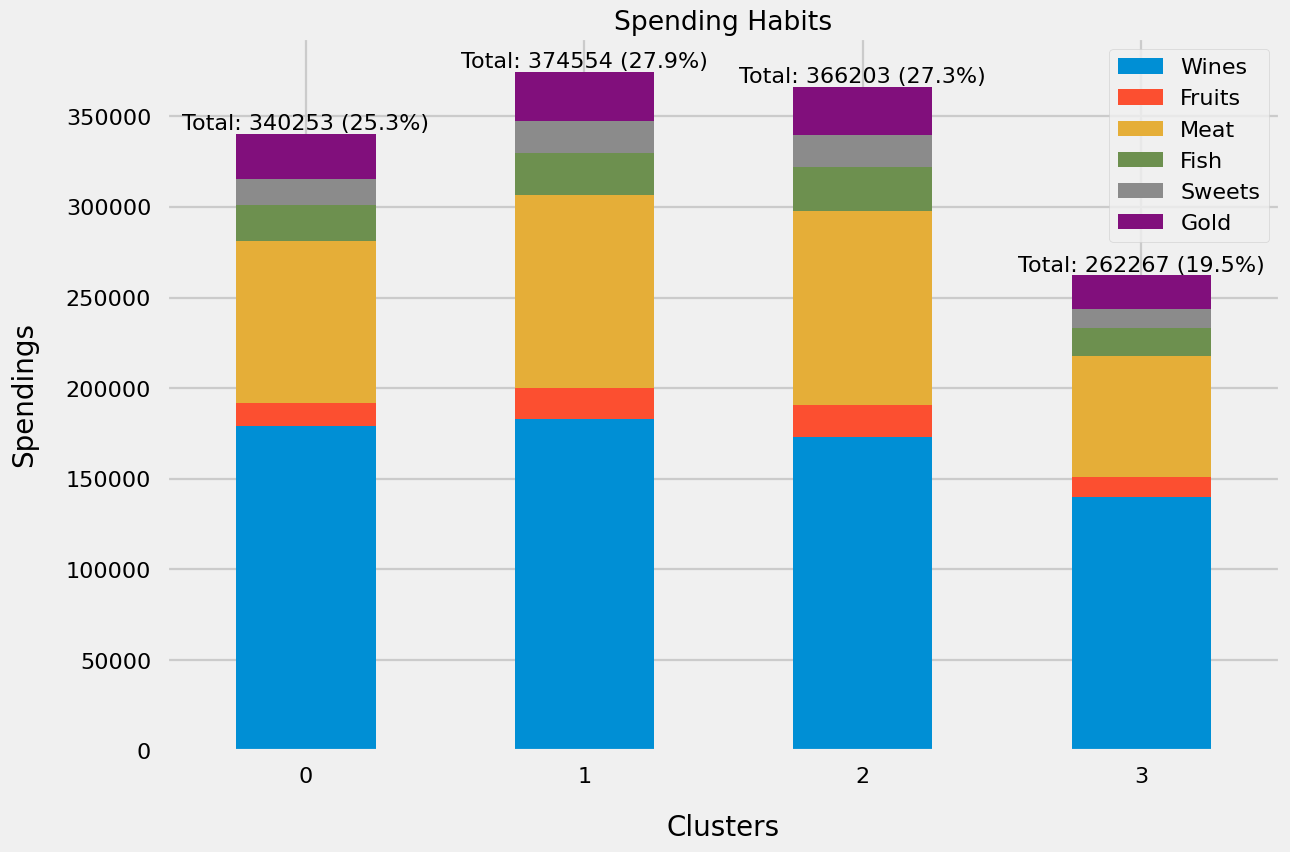

In [ ]:
cluster_spendings = df.groupby('cluster_value')[['Wines', 'Fruits','Meat', 'Fish', 'Sweets', 'Gold']].sum()
plt.figure(figsize=(20, 10))
ax = cluster_spendings.plot(kind='bar', stacked=True)

plt.title('Spending Habits')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)
plt.xticks(rotation=0, ha='center')

# add numbers & percent
total = cluster_spendings.sum(axis=1)
for i, t in enumerate(total):
    ax.text(i, t + 30, f'Total: {t} ({t / total.sum() * 100:.1f}%)', ha='center',va='bottom', fontsize=16)

plt.show()

In [ ]:
cross_tab = pd.crosstab(df['cluster_hobby'], df['cluster_value'])

print(cross_tab)

In [ ]:
df.Cluster = df.Cluster.replace({'B': 'Gold',
                'C': 'Silver',
                'D': 'Bronze',
                'A':'Diamond'})

df['Cluster'] = df.Cluster

In [ ]:
cross_tab = pd.crosstab(df['cluster_hobby'], df['cluster_value'])

print(cross_tab)